# DataCamp - Data Scientist Career Track (Python)

##   Statistical Thinking in Python (Part 1)


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Statistical Thinking in Python (Part 1)/"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##    CHAPTER 1  - Graphical exploratory data analysis


#### Exercício 1 - Introduction to exploratory data analysis

In [3]:
#vídeo
#Introduction to exploratory data analysis

df_swing_states = pd.read_csv(data_folder + "2008_swing_states.csv")

df_swing_states[['state', 'county', 'dem_share']].head(10)

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
5,PA,Wayne County,43.78
6,PA,Susquehanna County,44.08
7,PA,Warren County,46.85
8,OH,Ashtabula County,56.94
9,OH,Lake County,50.46


Exercício 2

In [4]:
#do EDA first

Exercício 3

In [5]:
# it is important to start there. But there is more

#### Exercício 4 - Plotting a histogram

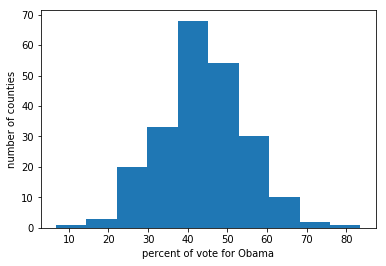

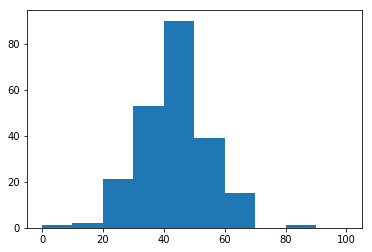

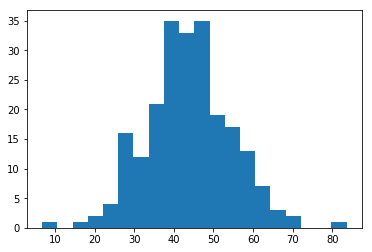

(array([ 1.,  0.,  1.,  2.,  4., 16., 12., 21., 35., 33., 35., 19., 17.,
        13.,  7.,  3.,  2.,  0.,  0.,  1.]),
 array([ 6.8  , 10.638, 14.476, 18.314, 22.152, 25.99 , 29.828, 33.666,
        37.504, 41.342, 45.18 , 49.018, 52.856, 56.694, 60.532, 64.37 ,
        68.208, 72.046, 75.884, 79.722, 83.56 ]),
 <a list of 20 Patch objects>)

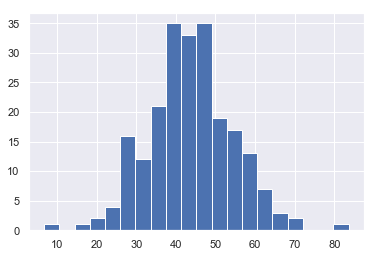

In [6]:
#vídeo

# since we only want the graph, assign a dummy variable '_' - it's common practice in python
_ = plt.hist(df_swing_states['dem_share'])
plt.xlabel("percent of vote for Obama")
plt.ylabel("number of counties")
plt.show()

# specifying the bins
bin_edges = [0, 10, 20 ,30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df_swing_states['dem_share'], bins=bin_edges) 
plt.show()

# or bins=
_ = plt.hist(df_swing_states['dem_share'], bins=20) 
plt.show()

# Set default Seaborn style
sns.set() 
plt.hist(df_swing_states['dem_share'], bins=20)

In [7]:
# iris data

from sklearn.datasets import load_iris
iris = load_iris()

# np.c_ is the numpy concatenate function, which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list and string list (in this case one string); 
# you can make this anything you'd like.. the original dataset would probably call this ['Species']

df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# rename column
df_iris.rename(columns={'target': 'species'}, inplace=True)  # como eles puseram

# replace column values
df_iris['species'] = df_iris['species'].map({0: "setosa", 1: 'versicolor', 2:'virginica'})  #como eles puseram

Exercício 5

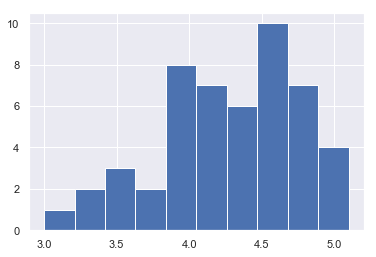

In [8]:
# Plotting a histogram of iris data

# o array que queríamos
versicolor_petal_length = df_iris[df_iris.species == 'versicolor']['petal length (cm)']

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length) 

# Show histogram
plt.show()

Exercício 6

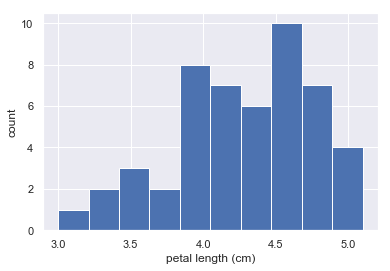

In [9]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
plt.ylabel('count')
plt.xlabel('petal length (cm)')

# Show histogram
plt.show()

Exercício 7

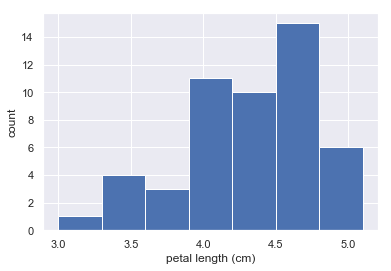

In [10]:
# The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule 
# of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

#### Exercício 8 - Plotting all of your data: Bee swarm plots

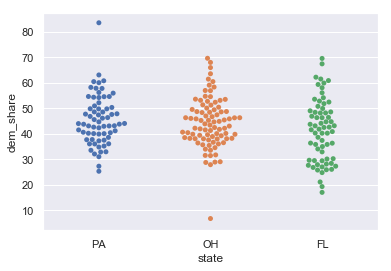

In [11]:
#vídeo

# ---> binning bias
# ---> the same data may be interpreted differently depending on choice of bins.

# para remediar, podemos fazer o bee swarm plot
sns.swarmplot(x='state', y='dem_share', data=df_swing_states)

Exercício 9

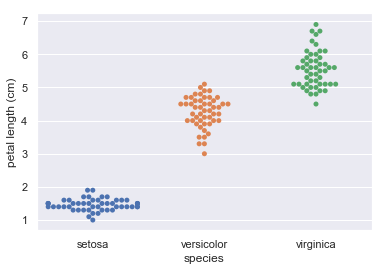

In [12]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x= 'species', y='petal length (cm)', data=df_iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

Exercício 10

In [13]:
# virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

#### Exercício 11 - Plotting all of your data: Empirical cumulative distribution functions

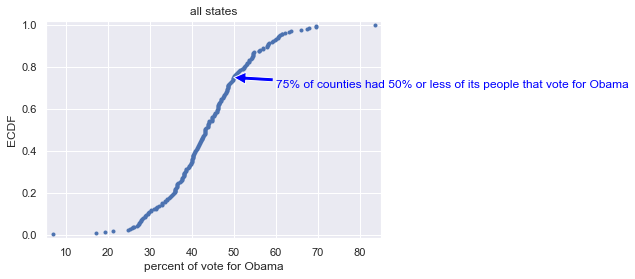

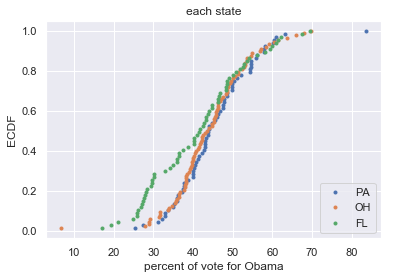

In [14]:
#vídeo

# Plot all the data
# ECDF

df_swing_states = pd.read_csv(data_folder + "2008_swing_states.csv")

# construir a ECDF - Empirical cumulative distribution function

x = np.sort(df_swing_states['dem_share'])  #ou sorted(df_swing_states['dem_share']) ; Series ---> df_swing_states['dem_share'].sort_values()
y = np.arange(1, len(x) + 1) / len(x)

# x são a percentagem de votos para o partido dem (Obama) por ordem crescente
# y é a percentagem de cada unidade: 1/222, 1/222, ... para termos o eixo do y e representar a CDF

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
_ = plt.title('all states')

#annotate   
plt.annotate(s='75% of counties had 50% or less of its people that vote for Obama', xy=(50, 0.75), xytext=(60, 0.7), color='blue', arrowprops=dict(facecolor='blue'))
# keeps data off plt edges
plt.margins(0.02)  

plt.show()

###############################################################################################################

# Plotting multiple ECDFs on the same plot:
PA = df_swing_states[df_swing_states['state'] == 'PA']
OH = df_swing_states[df_swing_states['state'] == 'OH']
FL = df_swing_states[df_swing_states['state'] == 'FL']

x_1 = np.sort(PA['dem_share'])
x_2 = np.sort(OH['dem_share'])
x_3 = np.sort(FL['dem_share'])

y_1 = np.arange(1, len(x_1) + 1) / len(x_1)
y_2 = np.arange(1, len(x_2) + 1) / len(x_2)
y_3 = np.arange(1, len(x_3) + 1) / len(x_3)

plt.plot(x_1, y_1, marker='.', linestyle='none', label="PA")
plt.plot(x_2, y_2, marker='.', linestyle='none', label="OH")
plt.plot(x_3, y_3, marker='.', linestyle='none', label="FL")

plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.title('each state')
plt.legend(loc= 'lower right')
plt.show()


# It's useful to show the ECDF first. 
# It plots all the data and gives a complete picture of how the picture is distributed.

Exercício 12

In [15]:
#  write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF.
# ECDFs are among the most important plots in statistical analysis.

def ecdf(data):
    """Compute ECDF for a **one-dimensional** array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

#exemplo: ecdf(PA['dem_share']) --> one-dimensional

Exercício 13

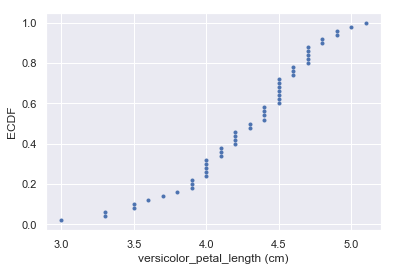

In [16]:
# Recall that your ecdf() function returns two arrays so you will need to unpack them.
# An example of such unpacking is x, y = foo(data), for some function foo()


# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# label the axis and plot
plt.xlabel('versicolor_petal_length (cm)')
plt.ylabel('ECDF')
plt.show()

Exercício 14

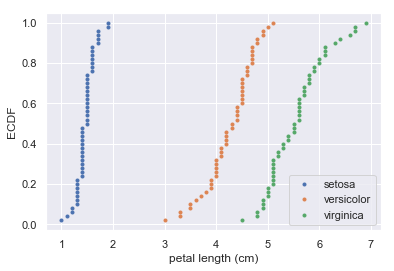

In [17]:
# Comparison of ECDFs

setosa_petal_length = df_iris[df_iris.species == 'setosa']['petal length (cm)']
versicolor_petal_length = df_iris[df_iris.species == 'versicolor']['petal length (cm)']
virginica_petal_length = df_iris[df_iris.species == 'virginica']['petal length (cm)']

# Unpack the ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()


# The ECDFs expose clear differences among the species. 
# Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

#### Exercício 15 - Onward toward the whole story

In [18]:
#vídeo

# "EDA can never be the whole story, but nothing else can serve as the foundation stone"
# -- John Tukey

# CHAPTER 2 - Quantitative exploratory data analysis

#### Exercício 1 - Introduction to summary statistics: the sample mean and median

In [19]:
#vídeo

Exercício 2

In [20]:
# outlier affects the mean, not the medianm

Exercício 3

In [21]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


#### Exercício 4 - Percentiles, outliers, and box plots

In [22]:
#vídeo

# Computing percentiles
np.percentile(df_swing_states['dem_share'], [25, 50, 75])

# boxplots

array([37.3025, 43.185 , 49.925 ])

Exercício 5

In [23]:
# Computing percentiles
versicolor_petal_length = df_iris[df_iris.species == 'versicolor']['petal length (cm)']

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


Exercício 6

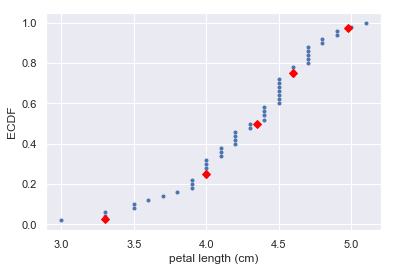

In [24]:
# Comparing percentiles to ECDF

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

Exercício 7

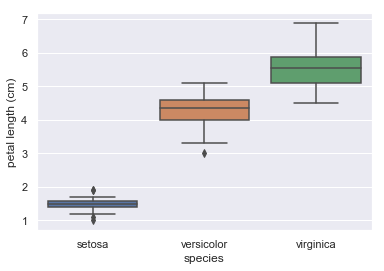

In [25]:
# Box-and-whisker plot

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df_iris)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

#### Exercício 8 - Variance and standard deviation

In [26]:
#vídeo

# computing the variance
print(np.var(df_swing_states['dem_share']))

# standard deviation
print(np.std(df_swing_states['dem_share']))
print(np.sqrt(np.var(df_swing_states['dem_share'])))

114.24649492735986
10.68861520157592
10.68861520157592


Exercício 9

In [27]:
# Computing the variance manually

# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


Exercício 10

In [28]:
# The standard deviation and the variance

# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


#### Exercício 11 - Covariance and Pearson correlation coefficient

In [29]:
#vídeo

Exercício 12

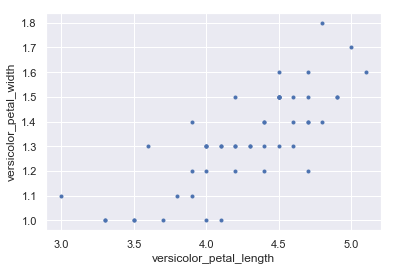

In [30]:
# Scatter plots

versicolor_petal_length = df_iris[df_iris.species == 'versicolor']['petal length (cm)']
versicolor_petal_width = df_iris[df_iris.species == 'versicolor']['petal width (cm)']


# scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

#plot
plt.show()

Exercício 13

In [31]:
#Variance and covariance by looking

Exercício 14

In [32]:
# Computing the covariance

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

print("========================================")

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


Exercício 15

In [33]:
# Computing the Pearson correlation coefficient

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between **two** arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

#ou
np.corrcoef(versicolor_petal_length, versicolor_petal_width)[0, 1]

0.7866680885228169


0.7866680885228169

# Chapter 3 - Thinking probabilistically -- Discrete variables

#### Exercício 1 - Probabilistic logic and statistical inference

In [34]:
#vídeo

Exercício 2

In [35]:
# Why do we do statistical inference?
# To draw probabilistic conclusions about what we might expect if we collected the same data again.
# To draw actionable conclusions from data.
# To draw more general conclusions from relatively few data or observations.

Exercício 3

In [36]:
#Which of the following is not a reason why we use probabilistic language in statistical inference?
#Probabilistic language is not very precise.

#### Exercício 4 - Random number generators and hacker statistics

In [37]:
#vídeo
# use simulated repeated measurements to compute probabilities
# np.random module
# np.random.random()  ---> draw a number between 0 and 1
# Bernoulli trial

# pseudo random generator
# Start with a random number seed (an integer) and generates random numbers in succession
# the same seed gives the same sequence of random numbers
# hence the name "pseudo" random generator

# Simulating 4 coin flips
np.random.seed(42)
random_numbers = np.random.random(size=4)
print(random_numbers)
heads = random_numbers < 0.5
print(heads)
np.sum(heads)

# with a for loop
n_all_heads = 0

for i in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads/10000

[0.37454012 0.95071431 0.73199394 0.59865848]
[ True False False False]


0.0619

Exercício 5

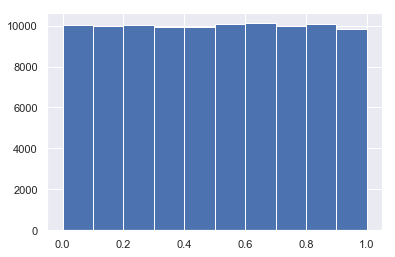

In [38]:
# Generating random numbers using the np.random module

# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

Exercício 6

In [39]:
# The np.random module and Bernoulli trials

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    
    n_success = 0

    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success


Exercício 7

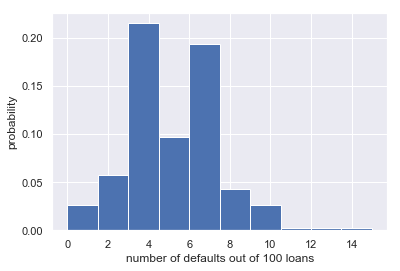

In [40]:
# How many defaults might we expect?

# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)   #podíamos ter feito com np.random.binomial(), mas vemos dps


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

Exercício 8

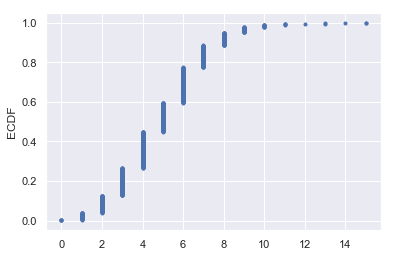

Probability of losing money = 0.022


In [41]:
# Will the bank fail?

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("")
plt.ylabel("ECDF")

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


#### Exercício 9 - Probability distributions and stories: The Binomial distribution

2
[2 2 2 2 2 3 3 2 2 0]


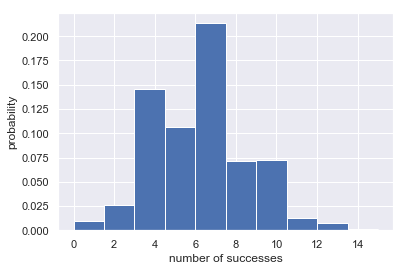

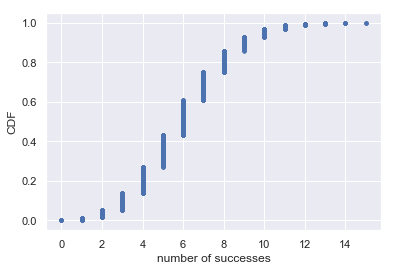

In [42]:
#vídeo
print(np.random.binomial(4, 0.5))
print(np.random.binomial(4, 0.5, size=10))

# The Binomial PMF (probability mass function)
samples = np.random.binomial(60, 0.1, size=10000)

plt.hist(samples, density=True)
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

# The Binomial CDF (cumulative distribution function)
x, y = ecdf(samples)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("number of successes")
plt.ylabel("CDF")
plt.show()

Exercício 10

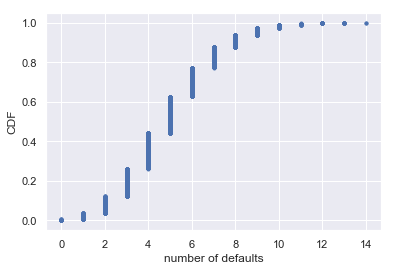

In [43]:
# Sampling out of the Binomial distribution

np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("number of defaults")
plt.ylabel("CDF")

# Show the plot
plt.show()

# using built-in algorithms to directly sample out of the distribution is much faster

Exercício 11

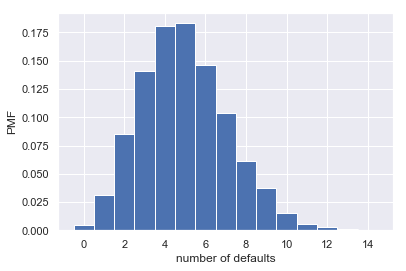

In [44]:
# Plotting the Binomial PMF

# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, density=True, bins=bins)

# Label axes
plt.xlabel("number of defaults")
plt.ylabel("PMF")

# Show the plot
plt.show()

#### Exercício 12 - Poisson processes and the Poisson distribution

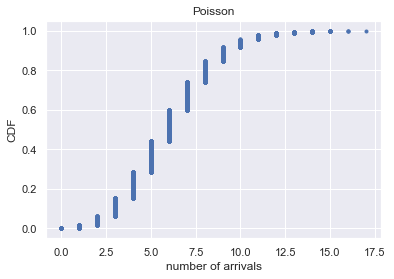

In [45]:
#vídeo

# examples of Poisson processes:

# natural births in a given hospital
# hits on a website during a given hour
# meteor strikes
# molecular collisions in a gas
# aviation incidents
# buses in Poissonville

# Poisson distribution --> derived from the Binomial distribution. 
#                      --> Limit of the Binomial distribution for low probability of success and large number of trials
# for rare events

# Poisson PMF

# Poisson CDF
samples = np.random.poisson(6, size=10000)

x, y = ecdf(samples)

plt.plot(x, y, marker='.', linestyle='none')
plt.title("Poisson")
plt.xlabel("number of arrivals")
plt.ylabel("CDF")
plt.show()


Exercício 13

In [46]:
# Relationship between Binomial and Poisson distributions

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson), np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial), np.std(samples_binomial))


# The means are all about the same, which can be shown to be true by doing some pen-and-paper work. 
# The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

Poisson:      10.0421 3.1718334745065038
n = 20 Binom: 10.0064 2.2476563438390667
n = 100 Binom: 9.9371 2.980091204980143
n = 1000 Binom: 10.0357 3.16430490155421


Exercício 14

In [47]:
# In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. 
# This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have 
# only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season
# is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we 
# would expect in a given season?

# Both Binomial and Poisson, though Poisson is easier to model and compute.

Exercício 15

In [48]:
# Was 2015 anomalous?
# 1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). 
# Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7) 

# Compute probability of getting seven or more: p_large
p_large = n_large/len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


# Chapter 4 - Thinking probabilistically -- Continuous variables

#### Exercício 1 - Probability density functions

In [49]:
#vídeo

Exercício 2

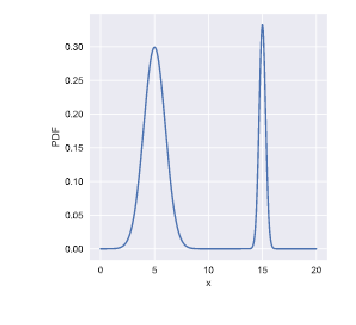

In [50]:
# Which of the following is true?

# x is more likely than not less than 10.

imagem = plt.imread(data_folder + "teste.PNG")
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.axis('off')
plt.imshow(imagem)

#  Correct! The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right.

Exercício 3

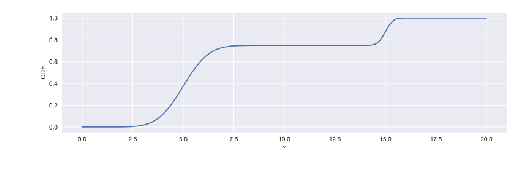

In [51]:
imagem = plt.imread(data_folder + "cdf.PNG")  
plt.subplots_adjust(left=0, bottom=-2, right=1.1, top=1, wspace=0, hspace=0)
plt.axis('off')
plt.imshow(imagem)

# Using the CDF, what is the probability that x is greater than 10?

# resposta: 0.25

#### Exercício 4 - Introduction to the Normal distribution

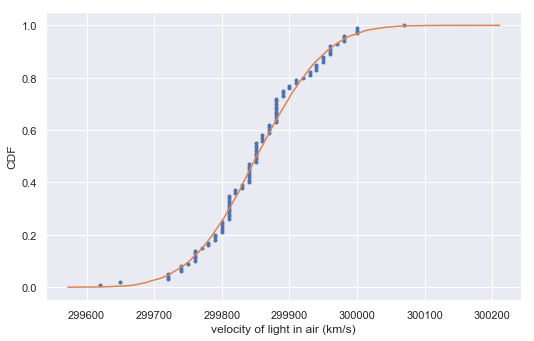

In [52]:
#vídeo

michelson_data = pd.read_csv(data_folder + "michelson_speed_of_light.csv")
michelson_speed_of_light = michelson_data['velocity of light in air (km/s)'] 

mean_msl = np.mean(michelson_speed_of_light)
std_msl = np.std(michelson_speed_of_light)

samples = np.random.normal(mean_msl, std_msl, size=10000)

x, y = ecdf(michelson_speed_of_light)
x_norm, y_normal = ecdf(samples)

# data
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("velocity of light in air (km/s)")
plt.ylabel("CDF")

#theoretical
plt.plot(x_norm, y_normal)

plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show() 

# checks normality 

Exercício 5

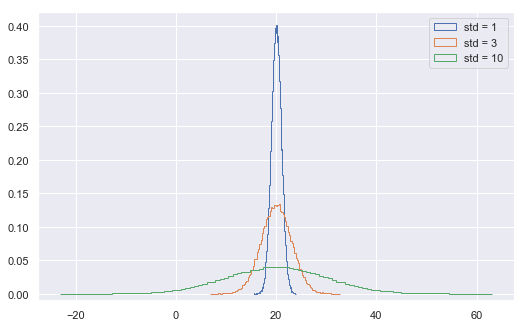

In [53]:
# The Normal PDF

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Plot a histograms of each of the samples; 
# For each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. 
# The latter keyword argument makes the plot look much like the smooth theoretical PDF.
plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.hist(samples_std3, bins=100, density=True, histtype='step')
plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


Exercício 6

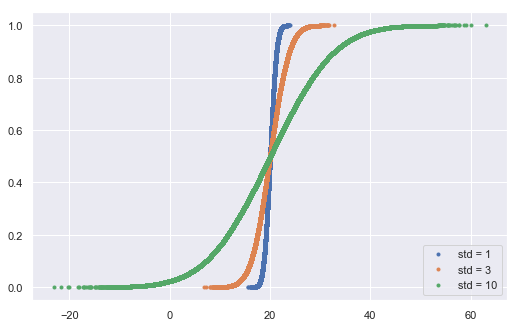

In [54]:
# The Normal CDF

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. 
# The width of the CDF varies with the standard deviation.

#### Exercício 7 - The Normal distribution: Properties and warnings

In [55]:
#vídeo

# not everything has norm dist. examine other perspectives of the data

Exercício 8

In [56]:
# Gauss and the 10 Deutschmark banknote

Exercício 9

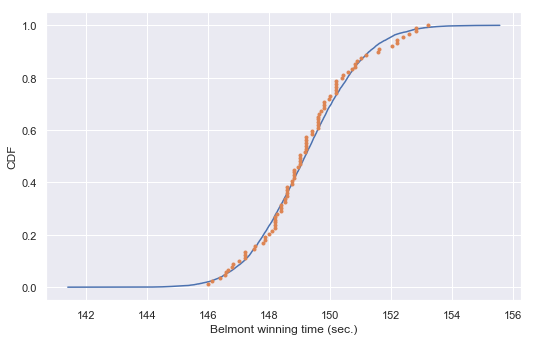

In [57]:
# Are the Belmont Stakes results Normally distributed?

belmont = pd.read_csv(data_folder + "belmont.csv")
# 1970 (Secretariat - faster) and 1973 (unusually wet and sloppy conditions) are outliers - remove from the data
belmont_no_outliers = belmont[(belmont['Year'] != 1970) & (belmont['Year'] != 1973)]

belmont_no_outliers = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]
######################################################################################################

# Compute mean and standard deviation of the data: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Take 10,000 samples out of a normal distribution with mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')

plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


# The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed.
# This also suggests that in the last 100 years or so, there have not been major technological or training advances
# that have significantly affected the speed at which horses can run this race.

Exercício 10

In [58]:
# What are the chances of a horse matching or beating Secretariat's record?

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000619


#### Exercício 11 - The exponential distribution

In [59]:
#vídeo

# the waiting time between arrivals of a Poisson process is exponentially distributed
# it has 1 parameter: the mean waiting time

# time between nuclear accidents - exponential dist

Exercício 12

In [60]:
# How might we expect the *time between* Major League no-hitters to be distributed?
# exponential

Exercício 13

In [61]:
# Waiting for the next Secretariat
# how many years you would expect to wait until you see another performance like Secretariat's. 
# How is the waiting time until the next performance as good or better than Secretariat's distributed?

#resposta: Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, 
#                       and the waiting time between arrivals of a Poisson process is Exponentially distributed.

Exercício 14

In [62]:
# If you have a story, you can simulate it

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of *2 successive Poisson processes*."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2


Exercício 15

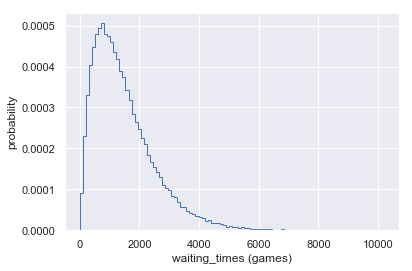

In [63]:
# Distribution of no-hitters and cycles

# Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. 
# The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

# Draw 100,000 samples out of the distribution of the waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
plt.xlabel("waiting_times (games)")
plt.ylabel("probability")

# Show the plot
plt.show()

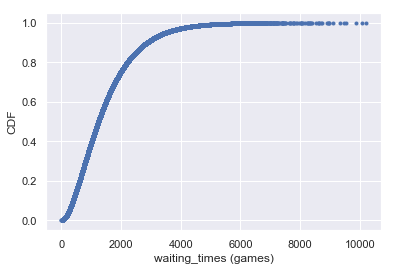

In [64]:
# CDF (cumulative distribution function)

x_hit, y_hit = ecdf(waiting_times)

plt.plot(x_hit, y_hit, marker='.', linestyle='none')
plt.xlabel("waiting_times (games)")
plt.ylabel("CDF")
plt.show()

#### Exercício 16 - final thoughts and encouragement toward statistical thinking II

In [65]:
#vídeo

# Fim